<a href="https://colab.research.google.com/github/DavideSecoli/seamLessML/blob/master/seamLessML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# allow full display of DataFrame rows 
pd.set_option('display.max_rows', None)

# config fig size
sns.set(rc={'figure.figsize':(14.0,6.0)})

In [ ]:
root_path = 'gdrive/My Drive/seamLess/assessment_log.json'

In [ ]:
# read json file 
df = pd.read_json(root_path, lines=True)
df.head()

,app_data,name,levelname,time
0,"{'description': None, 'marketStartTime': '2020...",tc3.core.exchange,INFO,2020-03-24 13:44:14.827
1,"{'description': None, 'marketStartTime': '2020...",tc3.core.exchange,INFO,2020-03-24 13:44:14.830
2,"{'status': 'OPEN', 'isMarketDataDelayed': Fals...",tc3.core.exchange,INFO,2020-03-24 13:44:14.904
3,"{'status': 'OPEN', 'isMarketDataDelayed': Fals...",tc3.core.exchange,INFO,2020-03-24 13:44:14.908
4,"{'status': 'OPEN', 'isMarketDataDelayed': Fals...",tc3.core.exchange,INFO,2020-03-24 13:44:14.982


Json data structure is nested and requires further expansion of 'app_data. Given the size of the file I'll split it by name first

In [ ]:
# check different names
df.name.unique()

array(['tc3.core.exchange', 'tc3.core.trader', 'tc3.execution.brokers'],
      dtype=object)

In [ ]:
# split data by name 
exchange = df[df.name == 'tc3.core.exchange']
trader = df[df.name == 'tc3.core.trader']
brokers = df[df.name == 'tc3.execution.brokers']

# **Exchange**

In [ ]:
exchange.head()

,app_data,name,levelname,time
0,"{'description': None, 'marketStartTime': '2020...",tc3.core.exchange,INFO,2020-03-24 13:44:14.827
1,"{'description': None, 'marketStartTime': '2020...",tc3.core.exchange,INFO,2020-03-24 13:44:14.830
2,"{'status': 'OPEN', 'isMarketDataDelayed': Fals...",tc3.core.exchange,INFO,2020-03-24 13:44:14.904
3,"{'status': 'OPEN', 'isMarketDataDelayed': Fals...",tc3.core.exchange,INFO,2020-03-24 13:44:14.908
4,"{'status': 'OPEN', 'isMarketDataDelayed': Fals...",tc3.core.exchange,INFO,2020-03-24 13:44:14.982


First two rows are descriptive and contain info about racing horses. 
Subsequent rows contain data timeseries

### **Exchange** **descriptive**

In [ ]:
# exctract exchange descriptive rows 
exchange_desc = pd.json_normalize(exchange.to_dict(orient='record'),record_path=["app_data", "runners"],meta=['time'])

# select only elements of first row as second is duplicate
exchange_desc = pd.DataFrame(exchange_desc).iloc[:19]

# remove undescriptive columns 
cols =['status','sp','removalDate','matches','totalMatched','adjustmentFactor','orders',
       'lastPriceTraded','ex.availableToBack','ex.availableToLay','ex.tradedVolume','metadata.OFFICIAL_RATING']
exchange_desc.drop(cols, inplace=True, axis=1)
exchange_desc

,handicap,runnerName,selectionId,sortPriority,metadata.WEIGHT_UNITS,metadata.COLOURS_DESCRIPTION,metadata.runnerId,metadata.FORECASTPRICE_DENOMINATOR,metadata.AGE,metadata.DAM_BRED,metadata.DAMSIRE_NAME,metadata.JOCKEY_NAME,metadata.STALL_DRAW,metadata.WEARING,metadata.SIRE_YEAR_BORN,metadata.TRAINER_NAME,metadata.DAM_YEAR_BORN,metadata.WEIGHT_VALUE,metadata.CLOTH_NUMBER_ALPHA,metadata.CLOTH_NUMBER,metadata.FORM,metadata.BRED,metadata.DAM_NAME,metadata.JOCKEY_CLAIM,metadata.SIRE_BRED,metadata.ADJUSTED_RATING,metadata.OWNER_NAME,metadata.DAYS_SINCE_LAST_RUN,metadata.COLOURS_FILENAME,metadata.DAMSIRE_YEAR_BORN,metadata.DAMSIRE_BRED,metadata.FORECASTPRICE_NUMERATOR,metadata.COLOUR_TYPE,metadata.SEX_TYPE,metadata.SIRE_NAME,time
0,0.0,Farmix,27157433,1.0,pounds,"Orange, beige chevrons on sleeves, beige cap",27157433,1,5,FR,Agent Bleu,Donagh Meyler,NaN,None,1997,Miss Elizabeth Doyle,2004,160,3,3,422,FR,Quamilla,None,FR,NaN,M. L. Bloodstock Limited,20,c20200324clo/00074357.jpg,1987,FR,2,b,g,Al Namix,2020-03-24 13:44:14.827
1,0.0,Florrie Webb,25013915,2.0,pounds,"Dark blue and red spots, check cap",25013915,1,6,IRE,Shantou,Rachael Blackmore,NaN,None,2003,Henry de Bromhead,2006,160,4,4,3,IRE,Some Catch,None,GER,NaN,Mrs L Halley & Mrs G Kinsella,256,c20200324clo/00859461.jpg,1993,USA,4,b,g,Prince Flori,2020-03-24 13:44:14.827
2,0.0,Coolagh Park,24044533,3.0,pounds,"Dark blue, white star, white stars on sleeves,...",24044533,1,6,FR,Cyborg,Keith Donoghue,NaN,tongue strap,1999,Gordon Elliott,2001,160,2,2,2862,GB,Gaspaie,None,FR,NaN,Mr Alan Harte,17,c20200324clo/00080662A.jpg,1982,FR,4,b,g,Kapgarde,2020-03-24 13:44:14.827
3,0.0,Jack Hackett,23225592,4.0,pounds,"Light green, black cross sashes, black sleeves...",23225592,1,6,IRE,Beneficial,P. E. Corbett,NaN,None,1997,Mrs D. A. Love,2004,168,1,1,1-44446,IRE,Corskeagh Shadow,None,UK,NaN,Mr Sean Reilly,23,c20200324clo/00038343.jpg,1990,UK,22,b,g,Beat Hollow,2020-03-24 13:44:14.827
4,0.0,Rebel Gold,26986439,5.0,pounds,"Orange, black epaulettes, halved sleeves, oran...",26986439,1,7,IRE,Definite Article,P. D. Kennedy,NaN,hood and tongue strap,2001,Thomas Foley,2003,160,9,9,890053,IRE,Julia's Girl,None,UK,NaN,Miss S. Foley,7,c20200324clo/00036612.jpg,1992,UK,12,b,g,Gold Well,2020-03-24 13:44:14.827
5,0.0,Satin Sun,28095568,6.0,pounds,"Black, white diamond, white diamonds on sleeve...",28095568,1,6,IRE,Anshan,B. Hayes,NaN,None,2004,James Daniel Dullea,1999,153,15,15,5,IRE,Murrosie,None,UK,NaN,James Dullea Racing Syndicate,19,c20200324clo/00859462.jpg,1987,UK,20,b,m,Mahler,2020-03-24 13:44:14.827
6,0.0,She Tops The Lot,28247531,7.0,pounds,"Black, light green star, light green sleeves, ...",28247531,1,7,IRE,Topanoora,D. Robinson,NaN,None,2001,Henry de Bromhead,2000,153,16,16,None,IRE,Top Lot,3,IRE,NaN,Foleys Bar Syndicate,0,c20200324clo/00836033.jpg,1987,UK,20,b,m,Yeats,2020-03-24 13:44:14.827
7,0.0,Justfortherecord,28247530,8.0,pounds,"Emerald green and orange hooped, white cap",28247530,1,5,IRE,Buster King,Niall Madden,NaN,None,1998,J. D. Motherway,2002,160,7,7,None,IRE,Bluesea Cracker,None,UK,NaN,Mr John P. McManus,0,c20200324clo/00032184.jpg,1986,UK,50,b,g,Milan,2020-03-24 13:44:14.827
8,0.0,Giftedtokate,28232003,9.0,pounds,"Black, yellow and black striped cap",28232003,1,5,UK,Anabaa,Mr S. F. O'Keeffe,NaN,None,2002,Miss Elizabeth Doyle,2001,160,5,5,None,IRE,Suspicious Minds,5,IRE,NaN,Hilary Walsh,0,c20200324clo/00834742.jpg,1992,USA,28,b,h,Scorpion,2020-03-24 13:44:14.827
9,0.0,Boghlone Honey,27915468,10.0,pounds,"Royal blue, light green seams, royal blue cap",27915468,1,5,IRE,Milan,Denis O'Regan,NaN,None,2003,Liam P. Cusack,2006,153,10,10,77,IRE,Peig Alainn,None,USA,NaN,Francis G Murray & John T Murray,16,c20200324clo/00861668.jpg,1998,UK,150,b,m,Jeremy,2020-03-24 13:44:14.827


In [ ]:
# number of participants  
num_part = exchange_desc.selectionId.nunique()
print('There are',num_part,'participants at the race')

There are 19 participants at the race


In [ ]:
print('Participants name list: \n', exchange_desc.runnerName.unique())

Participants name list: 
 ['Farmix' 'Florrie Webb' 'Coolagh Park' 'Jack Hackett' 'Rebel Gold'
 'Satin Sun' 'She Tops The Lot' 'Justfortherecord' 'Giftedtokate'
 'Boghlone Honey' 'Cornhill Lass' 'Morning Glisten' 'Kerrymaygold'
 'Gone Racing' 'Miss Sophiea' 'Carriealice' 'Western Dreaming'
 'Different Beat' 'Kopon']


In [ ]:
selectionId = exchange_desc.selectionId
print('Participants identification Id \n', selectionId)

Participants identification Id 
 0     27157433
1     25013915
2     24044533
3     23225592
4     26986439
5     28095568
6     28247531
7     28247530
8     28232003
9     27915468
10    26831220
11    28041063
12    24707404
13    24245268
14    27382103
15    25013914
16    26615399
17    27072317
18    27488784
Name: selectionId, dtype: int64


### **Implied** **Probability**

In [ ]:
# extract implied probability from forecast price  
implied_prob = exchange_desc[['selectionId','metadata.runnerId','runnerName','metadata.FORECASTPRICE_NUMERATOR','metadata.FORECASTPRICE_DENOMINATOR']]
implied_prob['impliedProb %'] = round(exchange_desc['metadata.FORECASTPRICE_DENOMINATOR'].astype(float) / (exchange_desc['metadata.FORECASTPRICE_NUMERATOR'].astype(float) + exchange_desc['metadata.FORECASTPRICE_DENOMINATOR'].astype(float)),4) * 100
implied_prob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,selectionId,metadata.runnerId,runnerName,metadata.FORECASTPRICE_NUMERATOR,metadata.FORECASTPRICE_DENOMINATOR,impliedProb %
0,27157433,27157433,Farmix,2,1,33.33
1,25013915,25013915,Florrie Webb,4,1,20.00
2,24044533,24044533,Coolagh Park,4,1,20.00
3,23225592,23225592,Jack Hackett,22,1,4.35
4,26986439,26986439,Rebel Gold,12,1,7.69
5,28095568,28095568,Satin Sun,20,1,4.76
6,28247531,28247531,She Tops The Lot,20,1,4.76
7,28247530,28247530,Justfortherecord,50,1,1.96
8,28232003,28232003,Giftedtokate,28,1,3.45
9,27915468,27915468,Boghlone Honey,150,1,0.66


In [ ]:
# market overround is 6.06%
overround = implied_prob['impliedProb %'].sum()
print('Market overround is', overround)

Market overround is 106.06


### **Exchange** **time** **series** **data**

In [ ]:
# select data after descriptive rows
data = exchange.iloc[38:].to_dict(orient='record')

# flat first level json keys
exchange_first = pd.json_normalize(data,record_path=["app_data", "runners"],meta=['time'])
exchange_first = pd.DataFrame(exchange_first)
exchange_first.head()

,status,handicap,selectionId,sp,removalDate,matches,totalMatched,adjustmentFactor,orders,lastPriceTraded,ex.availableToBack,ex.availableToLay,ex.tradedVolume,time
0,ACTIVE,0.0,27157433,None,None,None,91921.56,35.680,None,2.8,"[{'price': 2.8, 'size': 758.77}, {'price': 2.7...","[{'price': 2.8200000000000003, 'size': 527.87}...",[],2020-03-24 13:44:19.589
1,ACTIVE,0.0,25013915,None,None,None,46584.33,20.408,None,4.6,"[{'price': 4.6, 'size': 394.81}, {'price': 4.5...","[{'price': 4.7, 'size': 845.85}, {'price': 4.8...",[],2020-03-24 13:44:19.589
2,ACTIVE,0.0,24044533,None,None,None,25376.59,20.000,None,5.0,"[{'price': 5.0, 'size': 684.19}, {'price': 4.9...","[{'price': 5.1, 'size': 683.0}, {'price': 5.2,...",[],2020-03-24 13:44:19.589
3,ACTIVE,0.0,23225592,None,None,None,10172.94,7.692,None,13.0,"[{'price': 13.0, 'size': 138.89}, {'price': 12...","[{'price': 13.5, 'size': 245.91}, {'price': 14...",[],2020-03-24 13:44:19.589
4,ACTIVE,0.0,26986439,None,None,None,12026.35,7.407,None,12.5,"[{'price': 12.5, 'size': 97.23}, {'price': 12....","[{'price': 13.0, 'size': 182.51}, {'price': 13...",[],2020-03-24 13:44:19.589


Columns 'matches' , 'availableToBack' , 'availableToLay' are further nested within 'runners' key. Will expand them later as required

### **Task 1 summarise and describe our trading**

Following is an analysis of the market and it's microstructure followed by seamLess trading analysis

**Market** **analysis**

In [ ]:
# expand 'matches' path
exchange_trades = pd.json_normalize(data,record_path=["app_data",'runners','matches'],meta=[['app_data','runners','lastPriceTraded'],['app_data','runners','totalMatched'],
                                                                                             ['app_data','lastMatchTime'],['time'],['app_data','runners','selectionId']])

# cols to drop 
cols = ['matchDate','matchId','betId']
exchange_trades.drop(cols, inplace=True, axis=1)
exchange_trades.sort_values('size').tail()

,price,side,size,app_data.runners.lastPriceTraded,app_data.runners.totalMatched,app_data.lastMatchTime,time,app_data.runners.selectionId
2829,4.943918,LAY,2175.89,4.7,130240,2020-03-24T13:59:11.412000,2020-03-24 13:59:11.639,25013915
5128,4.943918,LAY,2175.89,4.7,140311,2020-03-24T14:00:11.211000,2020-03-24 14:00:11.471,25013915
2818,4.943918,LAY,2175.89,4.7,130158,2020-03-24T13:59:11.118000,2020-03-24 13:59:11.410,25013915
2862,4.943918,LAY,2175.89,4.8,130280,2020-03-24T13:59:12.115000,2020-03-24 13:59:12.483,25013915
5040,4.943918,LAY,2175.89,4.6,139872,2020-03-24T14:00:08.886000,2020-03-24 14:00:09.250,25013915


In [ ]:
time_start = exchange_trades['time'].iloc[:1]
print("Log time start is {}" .format(time_start))

Log time start is 0    2020-03-24 13:57:05.728
Name: time, dtype: object


In [ ]:
time_end = exchange_trades['time'].iloc[-1]
print("Log time end is {}" .format(time_end))

Log time end is 2020-03-24 14:00:29.721


In [ ]:
traded_names = exchange_trades['app_data.runners.selectionId'].nunique()
print('Number of traded names in this timeframe is {}' .format(traded_names))

Number of traded names in this timeframe is 11


In [ ]:
num_orders = exchange_trades.shape[0]
print('Number of orders sent in this timeframe is {}'.format(num_orders))

Number of orders sent in this timeframe is 5941


In [ ]:
tot_exec = exchange_trades['size'].sum()
print('Notional of orders sent in this timeframe is {}'.format(tot_exec))

Notional of orders sent in this timeframe is 2209933.42


In [ ]:
mean_size = exchange_trades['size'].mean()
print('Average order size is {}'.format(round((mean_size),2)))

Average order size is 371.98


Text(0, 0.5, 'Number of orders')

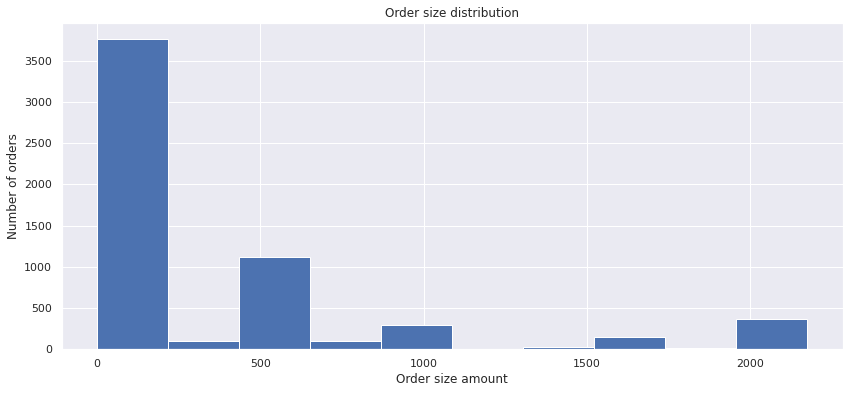

In [ ]:
exchange_trades['size'].hist()
plt.title('Order size distribution')
plt.xlabel('Order size amount')
plt.ylabel('Number of orders')

Average order size is  371.98. Order size is not normally distributed with long left tail. Far end of the curve is populatd by large lay orders of size 	2175.89 on selectionId  '25013915'



In [ ]:
exec_size_std = exchange_trades['size'].std()
print('Order size standard deviation is', round((exec_size_std),2))

Order size standard deviation is 589.17


In [ ]:
# total traded volume by name 
selectionId_traded = [27157433, 25013915, 24044533, 23225592, 26986439, 28095568, 28247531,28232003, 27915468, 24707404, 24245268]

for runner in selectionId_traded:
  tot_matched = exchange_trades[exchange_trades['app_data.runners.selectionId'] == runner]['app_data.runners.totalMatched'].iloc[-1]
  print('Selection ID {} total traded volume is {}' .format(runner, tot_matched))

Selection ID 27157433 total traded volume is 439806.92
Selection ID 25013915 total traded volume is 141372.19
Selection ID 24044533 total traded volume is 85635.27
Selection ID 23225592 total traded volume is 32792.63
Selection ID 26986439 total traded volume is 40808.55
Selection ID 28095568 total traded volume is 18683.92
Selection ID 28247531 total traded volume is 2273.98
Selection ID 28232003 total traded volume is 1460.29
Selection ID 27915468 total traded volume is 1145.46
Selection ID 24707404 total traded volume is 579.95
Selection ID 24245268 total traded volume is 450.52


Selection ID 27157433 traded approx 440k which is 3x more than the second. Below plot illustrates the difference in volume traded by race participants. Volume is > 0 at the start because matches occured prior to logs start 


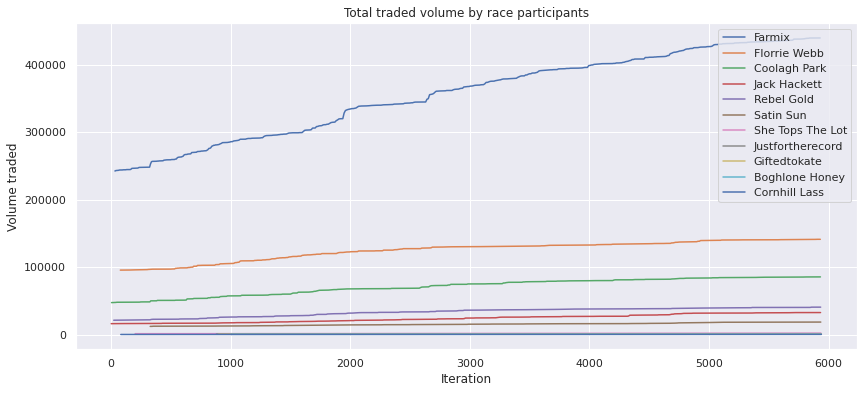

In [ ]:
for runner in selectionId_traded:
  runner_vol = exchange_trades[exchange_trades['app_data.runners.selectionId'] == runner]['app_data.runners.totalMatched'].plot()
  plt.title('Total traded volume by race participants')
  plt.xlabel('Iteration')
  plt.ylabel('Volume traded')
  plt.legend(exchange_desc['runnerName']) 


**Order** **books** **liquidity**

Below are the order books of top 3 traded names 

**Farmix** 

In [ ]:
# extract lay timeseries price data
exchange_lay = pd.json_normalize(data,record_path=["app_data", "runners","ex","availableToLay"],meta=[['time'],['app_data','runners','selectionId']])
exchange_lay = pd.DataFrame(exchange_lay)

# get farmix lay side of order book at the start of the period 
farmix_lay = exchange_lay[exchange_lay['app_data.runners.selectionId'] == 27157433].set_index('app_data.runners.selectionId')
farmix_lay = farmix_lay.rename(columns={"price": "lay", "size": "lay size","app_data.runners.selectionId":"selectionId"}).head(3)[['lay','lay size']]

In [ ]:
# extract back timeseries price data
exchange_back = pd.json_normalize(data,record_path=["app_data", "runners","ex","availableToBack"],meta=[['time'],['app_data','runners','selectionId']])
exchange_back = pd.DataFrame(exchange_back)

# get farmix back side of order book at the start of the period 
fermix_back = exchange_back[exchange_back['app_data.runners.selectionId'] == 27157433].set_index('app_data.runners.selectionId')
farmix_back = fermix_back.rename(columns={"price": "back", "size": "back size","app_data.runners.selectionId":"selectionId"}).head(3)[['back size','back']]

In [ ]:
# concat farmix lay and back 
farmix_book = pd.concat([farmix_back, farmix_lay], axis=1)
farmix_book

,back size,back,lay,lay size
app_data.runners.selectionId,,,,
27157433,758.77,2.80,2.82,527.87
27157433,603.55,2.78,2.84,845.77
27157433,572.23,2.76,2.86,615.48


In [ ]:
farmix_spread = (farmix_book['lay'].iloc[0] - farmix_book['back'].iloc[0])
farmix_liq_back = farmix_book['back size'].sum()
farmix_liq_lay = farmix_book['lay size'].sum()

print('Farmix order book spread in {:.2f} ticks wide'.format(farmix_spread))
print('Farmix BACK liquidity at touch is {}'.format(farmix_book['back size'].iloc[0]))
print('Farmix LAY liquidity at touch is {}'.format(farmix_book['lay size'].iloc[0]))
print('Farmix BACK liquidity across first three price lavels is {}'.format(farmix_liq_back))
print('Farmix BACK liquidity across first three price lavels is {}'.format(farmix_liq_lay))

Farmix order book spread in 0.02 ticks wide
Farmix BACK liquidity at touch is 758.77
Farmix LAY liquidity at touch is 527.87
Farmix BACK liquidity across first three price lavels is 1934.55
Farmix BACK liquidity across first three price lavels is 1989.12


**Florrie** **Webb**

In [ ]:
# get florrie lay side of order book at the start of the period 
florrie_lay = exchange_lay[exchange_lay['app_data.runners.selectionId'] == 25013915].set_index('app_data.runners.selectionId')
florrie_lay = florrie_lay.rename(columns={"price": "lay", "size": "lay size","app_data.runners.selectionId":"selectionId"}).head(3)[['lay','lay size']]

In [ ]:
# get florrie back side of order book at the start of the period 
florrie_back = exchange_back[exchange_back['app_data.runners.selectionId'] == 25013915].set_index('app_data.runners.selectionId')
florrie_back = florrie_back.rename(columns={"price": "back", "size": "back size","app_data.runners.selectionId":"selectionId"}).head(3)[['back size','back']]

In [ ]:
# concat florrie lay and back 
florrie_book = pd.concat([florrie_back, florrie_lay], axis=1)
florrie_book

,back size,back,lay,lay size
app_data.runners.selectionId,,,,
25013915,394.81,4.6,4.7,845.85
25013915,534.15,4.5,4.8,485.50
25013915,430.82,4.4,4.9,574.64


In [ ]:
florrie_spread = (florrie_book['lay'].iloc[0] - florrie_book['back'].iloc[0])
florrie_liq_back = florrie_book['back size'].sum()
florrie_liq_lay = florrie_book['lay size'].sum()

print('Florrie order book spread in {:.2f} ticks wide'.format(florrie_spread))
print('Florrie BACK liquidity at touch is {}'.format(florrie_book['back size'].iloc[0]))
print('Florrie LAY liquidity at touch is {}'.format(florrie_book['lay size'].iloc[0]))
print('Florrie BACK liquidity across first three price lavels is {}'.format(florrie_liq_back))
print('Florrie LAY liquidity across first three price lavels is {:2f}'.format(florrie_liq_lay))

Florrie order book spread in 0.10 ticks wide
Florrie BACK liquidity at touch is 394.81
Florrie LAY liquidity at touch is 845.85
Florrie BACK liquidity across first three price lavels is 1359.78
Florrie LAY liquidity across first three price lavels is 1905.990000


**Coolagh** **Park**

In [ ]:
# get coolagh lay side of order book at the start of the period 
coolagh_lay = exchange_lay[exchange_lay['app_data.runners.selectionId'] == 24044533].set_index('app_data.runners.selectionId')
coolagh_lay = coolagh_lay.rename(columns={"price": "lay", "size": "lay size","app_data.runners.selectionId":"selectionId"}).head(3)[['lay','lay size']]

In [ ]:
# get coolagh back side of order book at the start of the period 
coolagh_back = exchange_back[exchange_back['app_data.runners.selectionId'] == 24044533].set_index('app_data.runners.selectionId')
coolagh_back = coolagh_back.rename(columns={"price": "back", "size": "back size","app_data.runners.selectionId":"selectionId"}).head(3)[['back size','back']]

In [ ]:
# concat coolagh lay and back 
coolagh_book = pd.concat([coolagh_back, coolagh_lay], axis=1)
coolagh_book

,back size,back,lay,lay size
app_data.runners.selectionId,,,,
24044533,684.19,5.0,5.1,683.00
24044533,485.88,4.9,5.2,286.40
24044533,151.40,4.8,5.3,159.05


In [ ]:
coolagh_spread = (coolagh_book['lay'].iloc[0] - coolagh_book['back'].iloc[0])
coolagh_liq_back = coolagh_book['back size'].sum()
coolagh_liq_lay = coolagh_book['lay size'].sum()

print('Coolagh order book spread in {:.2f} ticks wide'.format(coolagh_spread))
print('Coolagh BACK liquidity at touch is {}'.format(coolagh_book['back size'].iloc[0]))
print('Coolagh LAY liquidity at touch is {}'.format(coolagh_book['lay size'].iloc[0]))
print('Coolagh BACK liquidity across first three price lavels is {:2f}'.format(coolagh_liq_back))
print('Coolagh LAY liquidity across first three price lavels is {:2f}'.format(coolagh_liq_lay))

Coolagh order book spread in 0.10 ticks wide
Coolagh BACK liquidity at touch is 684.19
Coolagh LAY liquidity at touch is 683.0
Coolagh BACK liquidity across first three price lavels is 1321.470000
Coolagh LAY liquidity across first three price lavels is 1128.450000


**SeamLess Trading**

In [ ]:
# exctract seamLess orders and fills 
brokers_df = pd.json_normalize(brokers.to_dict(orient='record'),record_path=[['app_data','instructionReports']])
brokers_df.tail()

,status,sizeMatched,betId,orderStatus,placedDate,averagePriceMatched,instruction.orderType,instruction.selectionId,instruction.limitOrder.price,instruction.limitOrder.persistenceType,instruction.limitOrder.size,instruction.side,errorCode,sizeCancelled,cancelledDate,instruction.betId,instruction.sizeReduction,instruction.limitOrder.timeInForce,instruction.limitOrder.minFillSize
1202,SUCCESS,19.04,198774883942,EXECUTION_COMPLETE,2020-03-24T14:00:07.000Z,45.57563,LIMIT,28095568.0,46.0,NaN,31.62,LAY,NaN,NaN,NaN,NaN,NaN,FILL_OR_KILL,0.01
1203,SUCCESS,0.00,198774884112,EXPIRED,2020-03-24T14:00:08.000Z,0.00000,LIMIT,28095568.0,44.0,NaN,4.04,LAY,NaN,NaN,NaN,NaN,NaN,FILL_OR_KILL,0.01
1204,SUCCESS,3.23,198774884322,EXECUTION_COMPLETE,2020-03-24T14:00:08.000Z,38.00000,LIMIT,28095568.0,46.0,NaN,3.23,LAY,NaN,NaN,NaN,NaN,NaN,FILL_OR_KILL,0.01
1205,SUCCESS,8.48,198774884667,EXECUTION_COMPLETE,2020-03-24T14:00:08.000Z,38.00000,LIMIT,28095568.0,38.0,NaN,8.48,LAY,NaN,NaN,NaN,NaN,NaN,FILL_OR_KILL,0.01
1206,SUCCESS,11.66,198774884886,EXECUTION_COMPLETE,2020-03-24T14:00:09.000Z,38.00000,LIMIT,28095568.0,40.0,NaN,11.66,LAY,NaN,NaN,NaN,NaN,NaN,FILL_OR_KILL,0.01


In [ ]:
# list of order status
brokers_df.orderStatus.unique()

array(['EXECUTABLE', 'EXECUTION_COMPLETE', nan, 'EXPIRED'], dtype=object)

In [ ]:
# number of orders
tot_orders = brokers_df[brokers_df['orderStatus'] == 'EXECUTABLE'].shape[0]
print('Number of executable orders sent out is {}'.format(tot_orders))

Number of executable orders sent out is 709


In [ ]:
# number of cancelled orders 
canc_orders = brokers_df[brokers_df['sizeCancelled'] > 0.001]
print('Number of cancelled orders is {}'. format(canc_orders.shape[0]))

Number of cancelled orders is 412


In [ ]:
# total exec 
tot_fills = brokers_df[brokers_df['orderStatus'] == 'EXECUTION_COMPLETE'].shape[0]
print('Number of executed orders is {}'.format(tot_fills))

Number of executed orders is 68


In [ ]:
filled_names = brokers_df[brokers_df['orderStatus'] == 'EXECUTION_COMPLETE']['instruction.selectionId'].nunique()
print('These {} orders were executed across {} different names'.format(tot_fills,filled_names))

These 68 orders were executed across 6 different names


In [ ]:
# names orders sent  
num_traded = brokers_df['instruction.selectionId'].nunique()
not_filled = num_traded - filled_names
print('Orders were sent across {} different names' .format(num_traded))
print('Therefore on {} names orders were not filled'.format(not_filled))

Orders were sent across 11 different names
Therefore on 5 names orders were not filled


In [ ]:
# order fill ratio percentage 
orderFill = round((tot_fills / tot_orders),4) * 100
print('Order fill ratio is {} %' .format(orderFill))

Order fill ratio is 9.59 %


In [ ]:
# tot size orders sent out 
order_size = brokers_df['instruction.limitOrder.size'].sum()
print('Total size of orders sent out is {:2f}' .format(order_size))

Total size of orders sent out is 14628.750000


**Fill** **analysis**

In [ ]:
# get executed orders 
fills = brokers_df[brokers_df['orderStatus'] == 'EXECUTION_COMPLETE']
fills.head()

,status,sizeMatched,betId,orderStatus,placedDate,averagePriceMatched,instruction.orderType,instruction.selectionId,instruction.limitOrder.price,instruction.limitOrder.persistenceType,instruction.limitOrder.size,instruction.side,errorCode,sizeCancelled,cancelledDate,instruction.betId,instruction.sizeReduction,instruction.limitOrder.timeInForce,instruction.limitOrder.minFillSize
21,SUCCESS,0.83,198774768643,EXECUTION_COMPLETE,2020-03-24T13:57:05.000Z,14.0,LIMIT,23225592.0,14.0,LAPSE,0.83,BACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,SUCCESS,7.65,198774779550,EXECUTION_COMPLETE,2020-03-24T13:57:30.000Z,10.0,LIMIT,26986439.0,10.0,LAPSE,7.65,BACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,SUCCESS,8.45,198774788664,EXECUTION_COMPLETE,2020-03-24T13:57:49.000Z,5.1,LIMIT,25013915.0,5.1,LAPSE,8.45,LAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,SUCCESS,7.48,198774799576,EXECUTION_COMPLETE,2020-03-24T13:58:08.000Z,13.0,LIMIT,23225592.0,13.0,LAPSE,7.48,BACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,SUCCESS,45.15,198774816447,EXECUTION_COMPLETE,2020-03-24T13:58:35.000Z,11.0,LIMIT,26986439.0,11.0,LAPSE,45.15,BACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Back** **fills**

In [ ]:
# number of back fills 
back_fills = brokers_df[(brokers_df['orderStatus'] == 'EXECUTION_COMPLETE') & (brokers_df['instruction.side'] == 'BACK')]
print('Number of back fills is {}'.format(back_fills.shape[0]))

Number of back fills is 22


In [ ]:
# total back size matched 
back_matched = round((back_fills['sizeMatched'].sum()),4)
print('Total back size matched is {}'.format(back_matched))

Total back size matched is 1694.35


In [ ]:
# average back price 
back_fills['price_size'] = (back_fills['averagePriceMatched'] * back_fills['sizeMatched'])
avg_back_price = round((back_fills['price_size'].sum() / back_fills['sizeMatched'].sum()),4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("Weighted average back price is {:2f}".format(avg_back_price))

Weighted average back price is 14.760900


In [ ]:
# back exposure 
back_exposure = round((back_matched * avg_back_price),2)
print('Back exposure on this race is {}'.format(back_exposure))

Back exposure on this race is 25010.13


**Lay** **fills**

In [ ]:
# number of lay fills 
lay_fills = brokers_df[(brokers_df['orderStatus'] == 'EXECUTION_COMPLETE') & (brokers_df['instruction.side'] == 'LAY')]
print('Number of back fills is {}'.format(lay_fills.shape[0]))

Number of back fills is 46


In [ ]:
# total lay size matched 
lay_matched = round((lay_fills['sizeMatched'].sum()),4)
print('Total back size matched is {}'.format(lay_matched))

Total back size matched is 561.27


In [ ]:
# average lay price 
lay_fills['price_size'] = (lay_fills['averagePriceMatched'] * lay_fills['sizeMatched'])
avg_lay_price = round((lay_fills['price_size'].sum() / lay_fills['sizeMatched'].sum()),4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("Weighted average back price is {}".format(avg_back_price))

Weighted average back price is 14.7609


In [ ]:
# lay exposure
lay_exposure = round((lay_matched * avg_lay_price),2)
print('Lay exposure on this race is {}'.format(lay_exposure))

Lay exposure on this race is 25840.93


### **Observations**

From what I could see in the logs SeamLess provided liquidity on Betfair exchange layering orders across three levels of the book on any traded name. 

As new data comes is these orders are then cancelled, size and price adjusted and replaced.

Style of trading appears not to be directional but rather delta neutral with back and lay exposure of very similar size 


### **Task 2. Evaluate how good our trading is**

In [ ]:
# get all fills 
fills = brokers_df[(brokers_df['orderStatus'] == 'EXECUTION_COMPLETE')]
fills['price_size'] = fills['sizeMatched'] * fills['averagePriceMatched']
fills.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,status,sizeMatched,betId,orderStatus,placedDate,averagePriceMatched,instruction.orderType,instruction.selectionId,instruction.limitOrder.price,instruction.limitOrder.persistenceType,instruction.limitOrder.size,instruction.side,errorCode,sizeCancelled,cancelledDate,instruction.betId,instruction.sizeReduction,instruction.limitOrder.timeInForce,instruction.limitOrder.minFillSize,price_size
21,SUCCESS,0.83,198774768643,EXECUTION_COMPLETE,2020-03-24T13:57:05.000Z,14.0,LIMIT,23225592.0,14.0,LAPSE,0.83,BACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.620
273,SUCCESS,7.65,198774779550,EXECUTION_COMPLETE,2020-03-24T13:57:30.000Z,10.0,LIMIT,26986439.0,10.0,LAPSE,7.65,BACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.500
491,SUCCESS,8.45,198774788664,EXECUTION_COMPLETE,2020-03-24T13:57:49.000Z,5.1,LIMIT,25013915.0,5.1,LAPSE,8.45,LAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.095
692,SUCCESS,7.48,198774799576,EXECUTION_COMPLETE,2020-03-24T13:58:08.000Z,13.0,LIMIT,23225592.0,13.0,LAPSE,7.48,BACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.240
926,SUCCESS,45.15,198774816447,EXECUTION_COMPLETE,2020-03-24T13:58:35.000Z,11.0,LIMIT,26986439.0,11.0,LAPSE,45.15,BACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,496.650


In [ ]:
# traded Ids  
tradedIds = fills['instruction.selectionId'].unique()

# function to get final expouse, side and avg price on all traded names 
for id in tradedIds:
  position = brokers_df[(brokers_df['orderStatus'] == 'EXECUTION_COMPLETE') & (brokers_df['instruction.selectionId'] == id)]['sizeMatched'].sum()
  price_size = fills[(fills['orderStatus'] == 'EXECUTION_COMPLETE') & (fills['instruction.selectionId'] == id)]['price_size'].sum()
  price_sum = fills[(fills['orderStatus'] == 'EXECUTION_COMPLETE') & (fills['instruction.selectionId'] == id)]['averagePriceMatched'].sum()
  size_sum = fills[(fills['orderStatus'] == 'EXECUTION_COMPLETE') & (fills['instruction.selectionId'] == id)]['sizeMatched'].sum()
  weighted_average_price = (price_size / size_sum)
  side = brokers_df[(brokers_df['orderStatus'] == 'EXECUTION_COMPLETE') & (brokers_df['instruction.selectionId'] == id)]['instruction.side'].iloc[-1]

  print('Position on Id {} is {} {} at weighted average price of {}'.format(int((id)), side, round((position),2),round((weighted_average_price),2)))

Position on Id 23225592 is BACK 1562.85 at weighted average price of 10.61
Position on Id 26986439 is BACK 74.17 at weighted average price of 11.05
Position on Id 25013915 is LAY 27.74 at weighted average price of 4.96
Position on Id 28232003 is BACK 57.33 at weighted average price of 132.66
Position on Id 28247531 is LAY 66.05 at weighted average price of 107.7
Position on Id 28095568 is LAY 467.48 at weighted average price of 39.77


In [ ]:
# map Ids to runner names 
exchange_desc[['runnerName','selectionId']]

,runnerName,selectionId
0,Farmix,27157433
1,Florrie Webb,25013915
2,Coolagh Park,24044533
3,Jack Hackett,23225592
4,Rebel Gold,26986439
5,Satin Sun,28095568
6,She Tops The Lot,28247531
7,Justfortherecord,28247530
8,Giftedtokate,28232003
9,Boghlone Honey,27915468


SeamLess exposure to the race is the following: 

**Jack Hackett** *backed* 1562.85 at weighted average price of 10.61

**Rebel Gold** *backed* 74.17 at weighted average price of 11.05

**Florrie Webb** *laid* 27.74 at weighted average price of 4.96

**Giftedtokate** *backed* 57.33 at weighted average price of 132.66

**She Tops The Lot** *laid* 66.05 at weighted average price of 107.7

**Satin Sun** *laid* 467.48 at weighted average price of 39.77



In [ ]:
for id in tradedIds:
  position = brokers_df[(brokers_df['orderStatus'] == 'EXECUTION_COMPLETE') & (brokers_df['instruction.selectionId'] == id)]['sizeMatched'].sum()
  price_size = fills[(fills['orderStatus'] == 'EXECUTION_COMPLETE') & (fills['instruction.selectionId'] == id)]['price_size'].sum()
  price_sum = fills[(fills['orderStatus'] == 'EXECUTION_COMPLETE') & (fills['instruction.selectionId'] == id)]['averagePriceMatched'].sum()
  size_sum = fills[(fills['orderStatus'] == 'EXECUTION_COMPLETE') & (fills['instruction.selectionId'] == id)]['sizeMatched'].sum()
  weighted_average_price = (price_size / size_sum)
  exposure = position * weighted_average_price
  side = brokers_df[(brokers_df['orderStatus'] == 'EXECUTION_COMPLETE') & (brokers_df['instruction.selectionId'] == id)]['instruction.side'].iloc[-1]

  print('{} position of {} at price of {} on ID {} gives total exposure of {}'.format(side ,round((position),2), round((weighted_average_price),2), int(id), round((exposure),2)))

BACK position of 1562.85 at price of 10.61 on ID 23225592 gives total exposure of 16585.38
BACK position of 74.17 at price of 11.05 on ID 26986439 gives total exposure of 819.32
LAY position of 27.74 at price of 4.96 on ID 25013915 gives total exposure of 137.62
BACK position of 57.33 at price of 132.66 on ID 28232003 gives total exposure of 7605.5
LAY position of 66.05 at price of 107.7 on ID 28247531 gives total exposure of 7113.35
LAY position of 467.48 at price of 39.77 on ID 28095568 gives total exposure of 18589.98


Out of the six positions, three were backed and three were laid. Note how backed positions have corresponding laid positions, similar to a long short equity portfolio. Clear example of this is ID 23225592 with ID 28095568

Total back exposure is 25010.2 whereas lay exposure is 25836.86

Outcome of the race was: 

https://www.sportinglife.com/racing/results/2020-03-24/clonmel/569131/money-back-on-the-boylesports-app-maiden-hurdle

1st Farmix 

2nd Rebel Gold

3rd Jack Hackett

4th Satin Sun

5th Boghlone Honey

6th She Tops The Lot

7th Morning Glisten

8th Cornhill Lass

9th Gone Racing

10th Florrie Webb

11th Carriealice

12th Coolagh Park

13th Giftedtokate

14th Kerrymaygold



Farmix won the race. SeamLess had not position on this name. Therefore, assuming no other orders were executed prior to the start of these logs, the outcome of the race was to 'collect premius' from laying IDs 25013915, 28247531, 28095568

### **Task 3: Outline a plan for improving our execution**

Most orders were executed 30 seconds before race start or few seconds in-play.

Taking selectionId '28232003' as an example, all four orders were executed in the space of 9 seconds. Price impact was significant where first back fill was at 140 and last one at 110


In [ ]:
orders = brokers_df[(brokers_df['orderStatus'] == 'EXECUTION_COMPLETE') & (brokers_df['instruction.selectionId'] == 28232003.0)][['orderStatus','placedDate','instruction.orderType','instruction.side',
                                                                            'instruction.orderType','instruction.limitOrder.price','instruction.limitOrder.size','instruction.limitOrder.persistenceType']]
orders

,orderStatus,placedDate,instruction.orderType,instruction.side,instruction.orderType,instruction.limitOrder.price,instruction.limitOrder.size,instruction.limitOrder.persistenceType
1137,EXECUTION_COMPLETE,2020-03-24T13:59:21.000Z,LIMIT,BACK,LIMIT,140.0,28.25,NaN
1139,EXECUTION_COMPLETE,2020-03-24T13:59:22.000Z,LIMIT,BACK,LIMIT,130.0,16.11,NaN
1141,EXECUTION_COMPLETE,2020-03-24T13:59:22.000Z,LIMIT,BACK,LIMIT,120.0,11.67,NaN
1148,EXECUTION_COMPLETE,2020-03-24T13:59:30.000Z,LIMIT,BACK,LIMIT,110.0,1.31,NaN


One way for improving execution would be to adopt VWAP or TWAP algorithms with features preventing orders from taking out levels on the book.

Performance can be analysed in a simulated environment where VWAP or TWAP algorithm price fills is compared to current execution methods